# Image Classifier using CNN

Data acquisition

In [1]:
!wget --no-check-certificate \
    https://github.com/btphan95/simple-cnn/blob/master/train.zip?raw=true \
    -O /tmp/train.zip

--2023-07-11 08:49:22--  https://github.com/btphan95/simple-cnn/blob/master/train.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/btphan95/simple-cnn/raw/master/train.zip [following]
--2023-07-11 08:49:22--  https://github.com/btphan95/simple-cnn/raw/master/train.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/btphan95/simple-cnn/master/train.zip [following]
--2023-07-11 08:49:22--  https://raw.githubusercontent.com/btphan95/simple-cnn/master/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11

In [2]:
!wget --no-check-certificate \
    https://github.com/btphan95/simple-cnn/blob/master/valid.zip?raw=true \
    -O /tmp/valid.zip

--2023-07-11 08:49:23--  https://github.com/btphan95/simple-cnn/blob/master/valid.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/btphan95/simple-cnn/raw/master/valid.zip [following]
--2023-07-11 08:49:23--  https://github.com/btphan95/simple-cnn/raw/master/valid.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/btphan95/simple-cnn/master/valid.zip [following]
--2023-07-11 08:49:23--  https://raw.githubusercontent.com/btphan95/simple-cnn/master/valid.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19

In [3]:
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/valid.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# Directory training images untuk dandelion
train_dandelion_dir = os.path.join('/tmp/train/dandelion')

# Directory training images untuk rumput (grass)
train_grass_dir = os.path.join('/tmp/train/grass')

# Directory validation images untuk dandelion
valid_dandelion_dir = os.path.join('/tmp/valid/dandelion')

# Directory validation images untuk rumput (grass)
valid_grass_dir = os.path.join('/tmp/valid/grass')

# Data checking

In [5]:
# Pengecekan isi direktori
train_dandelion_names = os.listdir(train_dandelion_dir)
print(train_dandelion_names[:5])

train_grass_names = os.listdir(train_grass_dir)
print(train_grass_names[:5])

validation_dandelion_hames = os.listdir(valid_dandelion_dir)
print(validation_dandelion_hames[:5])

validation_grass_names = os.listdir(valid_grass_dir)
print(validation_grass_names[:5])

['00000366.jpg', '00000454.jpg', '00000088.jpg', '00000071.jpg', '00000213.jpg']
['00000366.jpg', '00000454.jpg', '00000088.jpg', '00000071.jpg', '00000213.jpg']
['00000088.jpg', '00000071.jpg', '00000024.jpg', '00000007.jpg', '00000075.jpg']
['00000024.jpg', '00000007.jpg', '00000043.jpg', '00000002.jpg', '00000054.jpg']


In [6]:
print('banyaknya training images dandelion:', len(os.listdir(train_dandelion_dir)))
print('banyaknya training images rumput:', len(os.listdir(train_grass_dir)))
print('banyaknya validation images dandelion:', len(os.listdir(valid_dandelion_dir)))
print('banyaknya validation images rumput:', len(os.listdir(valid_grass_dir)))

banyaknya training images dandelion: 500
banyaknya training images rumput: 499
banyaknya validation images dandelion: 92
banyaknya validation images rumput: 65


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set konfigurasi keluaran pada grafik menjadi 5x5
nrows = 2
ncols = 5

# Indeks untuk mengulang-ulang gambar
pic_index = 0

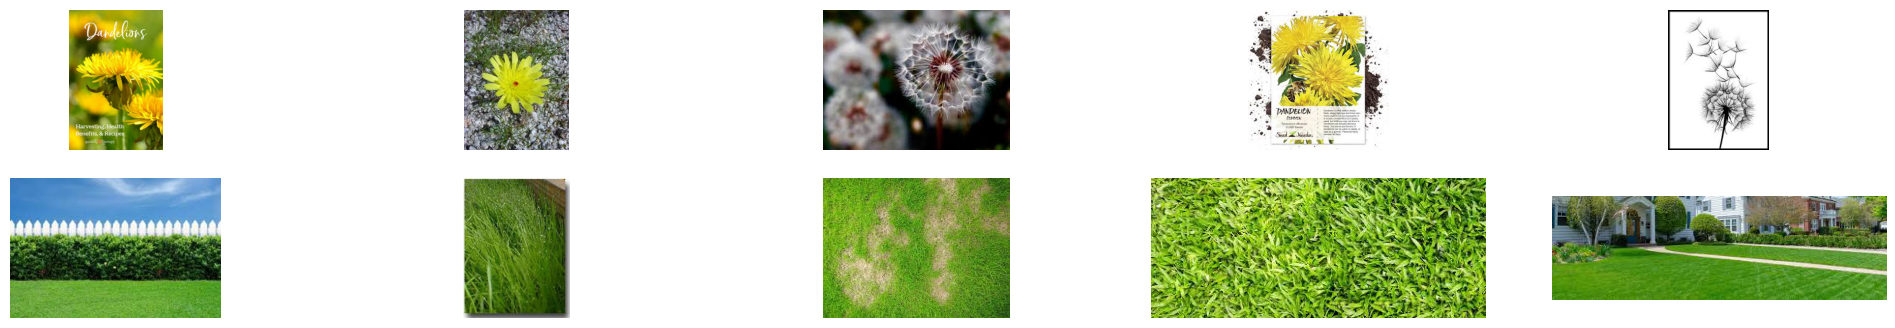

In [8]:
# Set up matplotlib fig, dengan ukuran gambar 5x2
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 2)

pic_index += 8
next_dandelion_pic = [os.path.join(train_dandelion_dir, fname)
                for fname in train_dandelion_names[pic_index-5:pic_index]]
next_grass_pic = [os.path.join(train_grass_dir, fname)
                for fname in train_grass_names[pic_index-5:pic_index]]

for i, img_path in enumerate(next_dandelion_pic + next_grass_pic):
  # Set up subplot; indeks subplot mulai dari 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # tidak menampilkan sumbu (atau gridline)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Data preprocessing

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# semua gambar akan dirubah skalanya menjadi 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# membuat training image dalam batch sebanyak 120 menggunakan generator train_datagen
train_generator = train_datagen.flow_from_directory(
        '/tmp/train/',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(224, 224),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# membuat validation dalam batch sebanyak 19 menggunakan generator validation_datagen
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/valid/',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(224, 224),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 999 images belonging to 2 classes.
Found 157 images belonging to 2 classes.


# CNN Classifier Modelling

In [10]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [11]:
model = tf.keras.models.Sequential([
# catatan, bentuk inputnya adalah ukuran gambar yang diinginkan yaitu 200x200 dengan warna 3 byte

# konvolusi pertama
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
tf.keras.layers.MaxPooling2D(2, 2),

# konvolusi kedua
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

# konvolusi ketiga
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

# Konvolusi keempat
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

# Konvolusi kelima
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

# flatten hasil untuk dimasukkan ke dalam DNN
tf.keras.layers.Flatten(),

# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),

# 1 output neuron yang akan berisi nilai dari 0-1 di mana 0 untuk kelas ('dandelion') dan 1 untuk kelas ('grass')
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [13]:
# model training
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_generator, steps_per_epoch=8, epochs=40, verbose=1,
      validation_data = validation_generator, validation_steps=8)

Epoch 1/40
8/8 [==============================] - 34s 4s/step - loss: 0.6379 - accuracy: 0.6257 - val_loss: 0.6060 - val_accuracy: 0.6447
Epoch 2/40
8/8 [==============================] - 33s 5s/step - loss: 0.5235 - accuracy: 0.7406 - val_loss: 0.6040 - val_accuracy: 0.6513
Epoch 3/40
8/8 [==============================] - 32s 4s/step - loss: 0.4669 - accuracy: 0.7713 - val_loss: 0.5952 - val_accuracy: 0.6908
Epoch 4/40
8/8 [==============================] - 35s 4s/step - loss: 0.4229 - accuracy: 0.8104 - val_loss: 0.5466 - val_accuracy: 0.7368
Epoch 5/40
8/8 [==============================] - 35s 5s/step - loss: 0.3950 - accuracy: 0.8043 - val_loss: 0.5108 - val_accuracy: 0.7368
Epoch 6/40
8/8 [==============================] - 33s 4s/step - loss: 0.3648 - accuracy: 0.8362 - val_loss: 0.4811 - val_accuracy: 0.7763
Epoch 7/40
8/8 [==============================] - 32s 4s/step - loss: 0.3758 - accuracy: 0.8282 - val_loss: 0.7828 - val_accuracy: 0.6184
Epoch 8/40
8/8 [==================

In [24]:
# Mengambil data akurasi dan loss dari history
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Mengambil jumlah epoch
epochs = range(1, len(train_acc) + 1)

<Figure size 640x480 with 0 Axes>

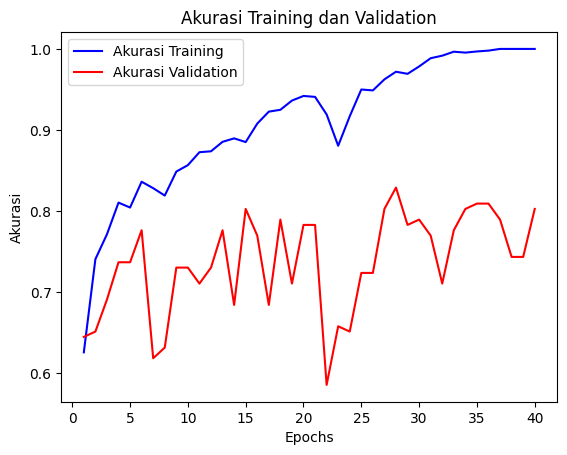

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot akurasi
plt.plot(epochs, train_acc, 'b', label='Akurasi Training')
plt.plot(epochs, val_acc, 'r', label='Akurasi Validation')
plt.title('Akurasi Training dan Validation')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

# Menampilkan grafik akurasi
plt.figure()

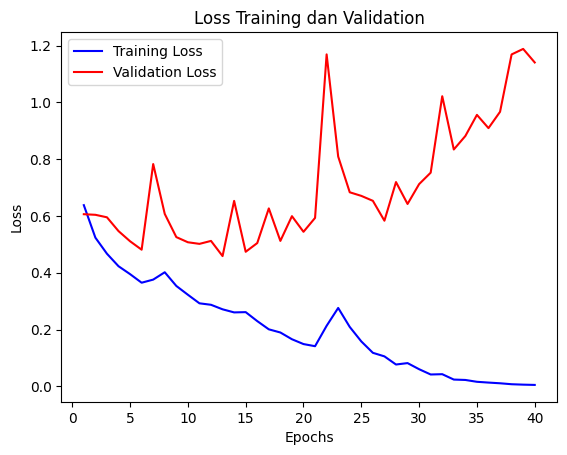

In [26]:
# Plot loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Training dan Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Menampilkan grafik loss
plt.show()

# Evaluasi Model

In [27]:
model.evaluate(validation_generator)

9/9 [==============================] - 2s 251ms/step - loss: 1.3323 - accuracy: 0.7898


[1.3322993516921997, 0.7898089289665222]

In [28]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator, verbose=1)

9/9 [==============================] - 2s 170ms/step


In [29]:
# Evaluasi model
evaluation = model.evaluate(validation_generator)

# Mengambil nilai akurasi dari evaluasi
accuracy = evaluation[1]

# Menampilkan nilai akurasi dalam format persen
print('Akurasi model: {:.2%}'.format(accuracy))

9/9 [==============================] - 2s 170ms/step - loss: 1.3323 - accuracy: 0.7898
Akurasi model: 78.98%


In [30]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)

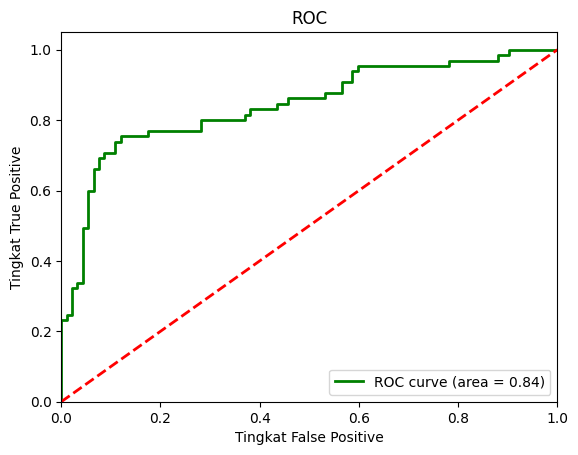

In [31]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tingkat False Positive')
plt.ylabel('Tingkat True Positive')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Kurva ROC adalah kurva probabilitas yang memplotkan true-positive rate (TPR) terhadap false-positive rate (FPR). Dalam kurva ini, garis diagonal adalah kurva untuk tebakan acak, misalnya pelemparan koin, sehingga kurva ROC di atas menunjukkan bahwa model kami bekerja lebih baik daripada secara kebetulan dalam mengklasifikasikan antara dandelion dan rumput. Tidak buruk!

Demikian pula, AUC (area under curve), seperti yang ditunjukkan pada legend di atas, mengukur seberapa besar kemampuan model kita dalam membedakan antara dua kelas, dandelion dan rumput. Semakin tinggi AUC, semakin baik model kita dalam mengklasifikasikan.

# Prediction

Saving gambar1.jpg to gambar1 (2).jpg
1/1 [==============================] - 0s 90ms/step
[0.]
gambar1.jpg adalah dandelion


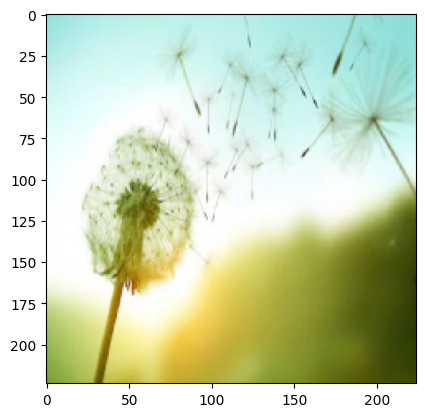

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " adalah dandelion")
  else:
    print(fn + " adalah rumput")

Jalankan cell berikut ini untuk menghentikan kernel dan mengosongkan memory resources

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)